In [23]:
import qiskit as qk
import qiskit_aer as qaer

import numpy as np
import math

In [5]:
sSimulator = qaer.Aer.backends(name="statevector_simulator")[0]
mSimulator = qaer.Aer.backends(name="qasm_simulator")[0]

# Using Statevector Simulator

In [24]:
qr = qk.QuantumRegister(1)

helloQubit = qk.QuantumCircuit(qr)

## identity operator on q0
helloQubit.id(qr[0])

job = sSimulator.run(helloQubit)
result = job.result()
result.get_statevector()

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


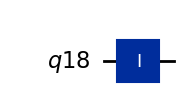

In [25]:
helloQubit.draw("mpl")

In [26]:
qr = qk.QuantumRegister(3)

qc = qk.QuantumCircuit(qr)

qc.id(qr[0])
qc.id(qr[1])
qc.id(qr[2])


job = sSimulator.run(qc)
result = job.result()
result.get_statevector()

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


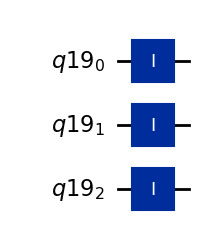

In [27]:
qc.draw("mpl")

# Using QASM Simulator

In [32]:
qr = qk.QuantumRegister(1)
cr = qk.ClassicalRegister(1)
qc = qk.QuantumCircuit(qr, cr)

qc.h(qr[0])
qc.measure(qr, cr)

job = mSimulator.run(qc)
result = job.result()
result.get_counts(qc)

{'0': 529, '1': 495}

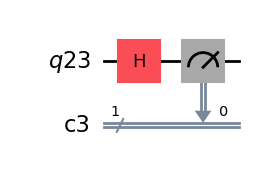

In [33]:
qc.draw("mpl")

In [38]:
qr = qk.QuantumRegister(2)
cr = qk.ClassicalRegister(2)
qc = qk.QuantumCircuit(qr, cr)

qc.h(qr[0])
qc.h(qr[1])
qc.measure(qr, cr)

counts = mSimulator.run(qc).result().get_counts(qc)
print(counts)

{'11': 264, '00': 259, '10': 257, '01': 244}


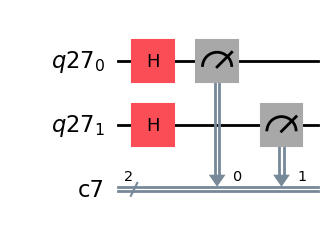

In [39]:
qc.draw("mpl")

In [40]:
## Partial Measurement

qr = qk.QuantumRegister(2)
cr = qk.ClassicalRegister(2)
qc = qk.QuantumCircuit(qr, cr)

qc.h(qr[0])
qc.h(qr[1])
qc.measure(qr[0], cr[0])

counts = mSimulator.run(qc).result().get_counts(qc)
print(counts)

{'01': 546, '00': 478}


# Perfect Coin Algorithm

In [58]:
def perfect_coinflip(numFlips):

    qr = qk.QuantumRegister(1)
    cr = qk.ClassicalRegister(1)

    coin = qk.QuantumCircuit(qr, cr)
    coin.h(qr[0])
    coin.measure(qr, cr)

    counts = mSimulator.run(coin, shots=numFlips).result().get_counts(coin)
    heads = counts["0"]
    tails = counts["1"]

    return heads, tails

In [63]:
numHeads, numTails = perfect_coinflip(100)

print(f"Heads: {numHeads}")
print(f"Tails: {numTails}")

Heads: 60
Tails: 40
